<a href="https://colab.research.google.com/github/advaitds2021/Cureya-Internship/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3: HOUSE PRICE PREDICTION**

Import required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Q1) Read the dataset from csv

In [3]:
from google.colab import files
uploaded = files.upload()

Saving HousingData.csv to HousingData.csv


In [4]:
import io
df_housing = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Q2) Data Preprocessing

**Check shape of the data**

In [5]:
df_housing.shape

(506, 14)

**Check data type**

In [6]:
df_housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

**Print statistical summary of the dataset**

In [7]:
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Check for null values



In [8]:
df_housing.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

The data contains missing values, calculate missing value percentage

In [9]:
percentval = {}
total = len(df_housing)
for i in df_housing.columns:
  percent = (df_housing[i].isnull().sum() / total) * 100
  percentval[i] = percent

print("The percentage of missing values in features:\n", "\n", percentval)

The percentage of missing values in features:
 
 {'CRIM': 3.9525691699604746, 'ZN': 3.9525691699604746, 'INDUS': 3.9525691699604746, 'CHAS': 3.9525691699604746, 'NOX': 0.0, 'RM': 0.0, 'AGE': 3.9525691699604746, 'DIS': 0.0, 'RAD': 0.0, 'TAX': 0.0, 'PTRATIO': 0.0, 'B': 0.0, 'LSTAT': 3.9525691699604746, 'MEDV': 0.0}


Plot a boxplot and check if the data contains outliers

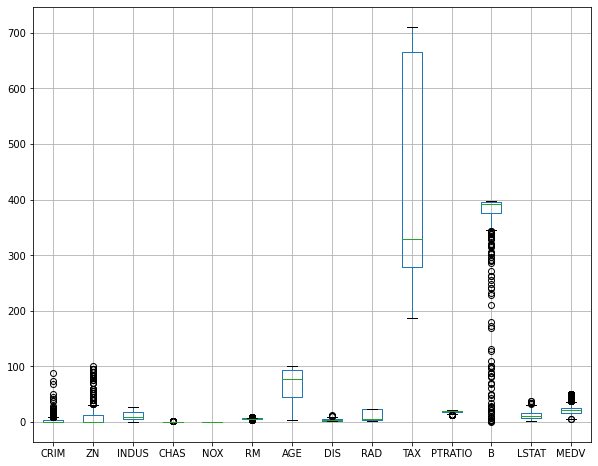

In [10]:
df_housing.boxplot(figsize=(10,8))
plt.show()


Data contains outliers hence we compute missing values with median

In [11]:
df_data = df_housing.fillna(df_housing.median())

In [12]:
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Data Standardization**

In [13]:
df_feature = df_data.drop('MEDV', axis=1)
df_target = df_data[['MEDV']]

In [14]:
ss = StandardScaler()
scaled_feature = ss.fit_transform(df_feature)
scaled_target = ss.fit_transform(df_target.values)
scaled_feature = scaled_feature

In [15]:
df_scaled_feature = pd.DataFrame(scaled_feature, columns = df_feature.columns)
df_scaled_target = pd.DataFrame(scaled_target, columns = df_target.columns)

In [16]:
df = pd.concat([df_scaled_feature, df_scaled_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.405592,0.314369,-1.301706,-0.268391,-0.144217,0.413672,-0.132771,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.096193,0.159686
1,-0.403140,-0.468160,-0.591052,-0.268391,-0.740262,0.194274,0.366141,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.502779,-0.101524
2,-0.403142,-0.468160,-0.591052,-0.268391,-0.740262,1.282714,-0.282080,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.231709,1.324247
3,-0.402549,-0.468160,-1.321115,-0.268391,-0.835284,1.016303,-0.839258,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.387195,1.182758
4,-0.398265,-0.468160,-1.321115,-0.268391,-0.835284,1.228577,-0.533356,1.077737,-0.752922,-1.106115,0.113032,0.441052,-0.176116,1.487503


Q3) Visualize some of the attributes of the data

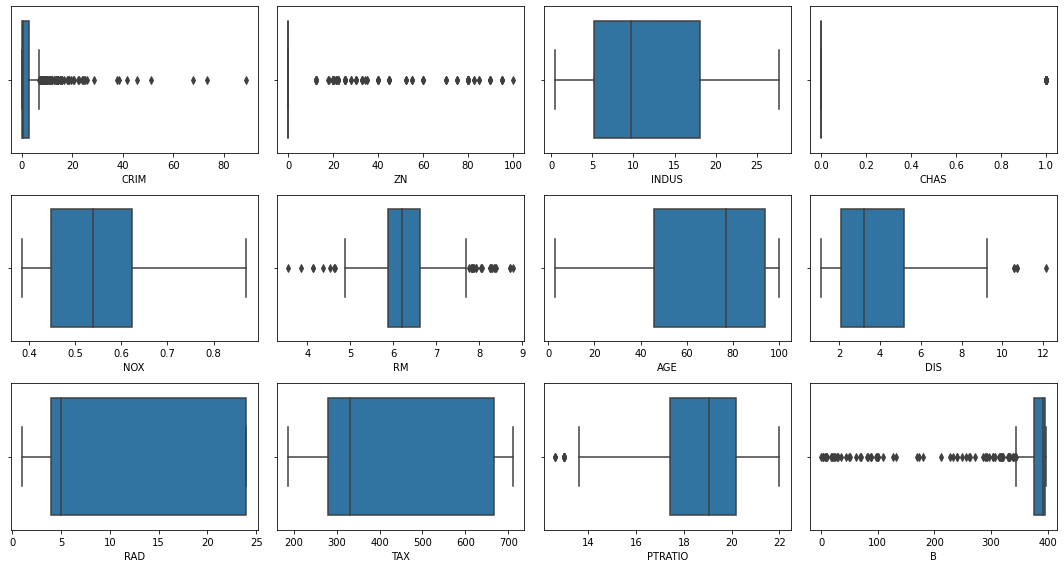

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(15,8))
for var, subplot in zip(df_data, ax.flatten()):
    sns.boxplot(x=df_data[var], ax=subplot)

plt.tight_layout()

<Figure size 864x576 with 0 Axes>

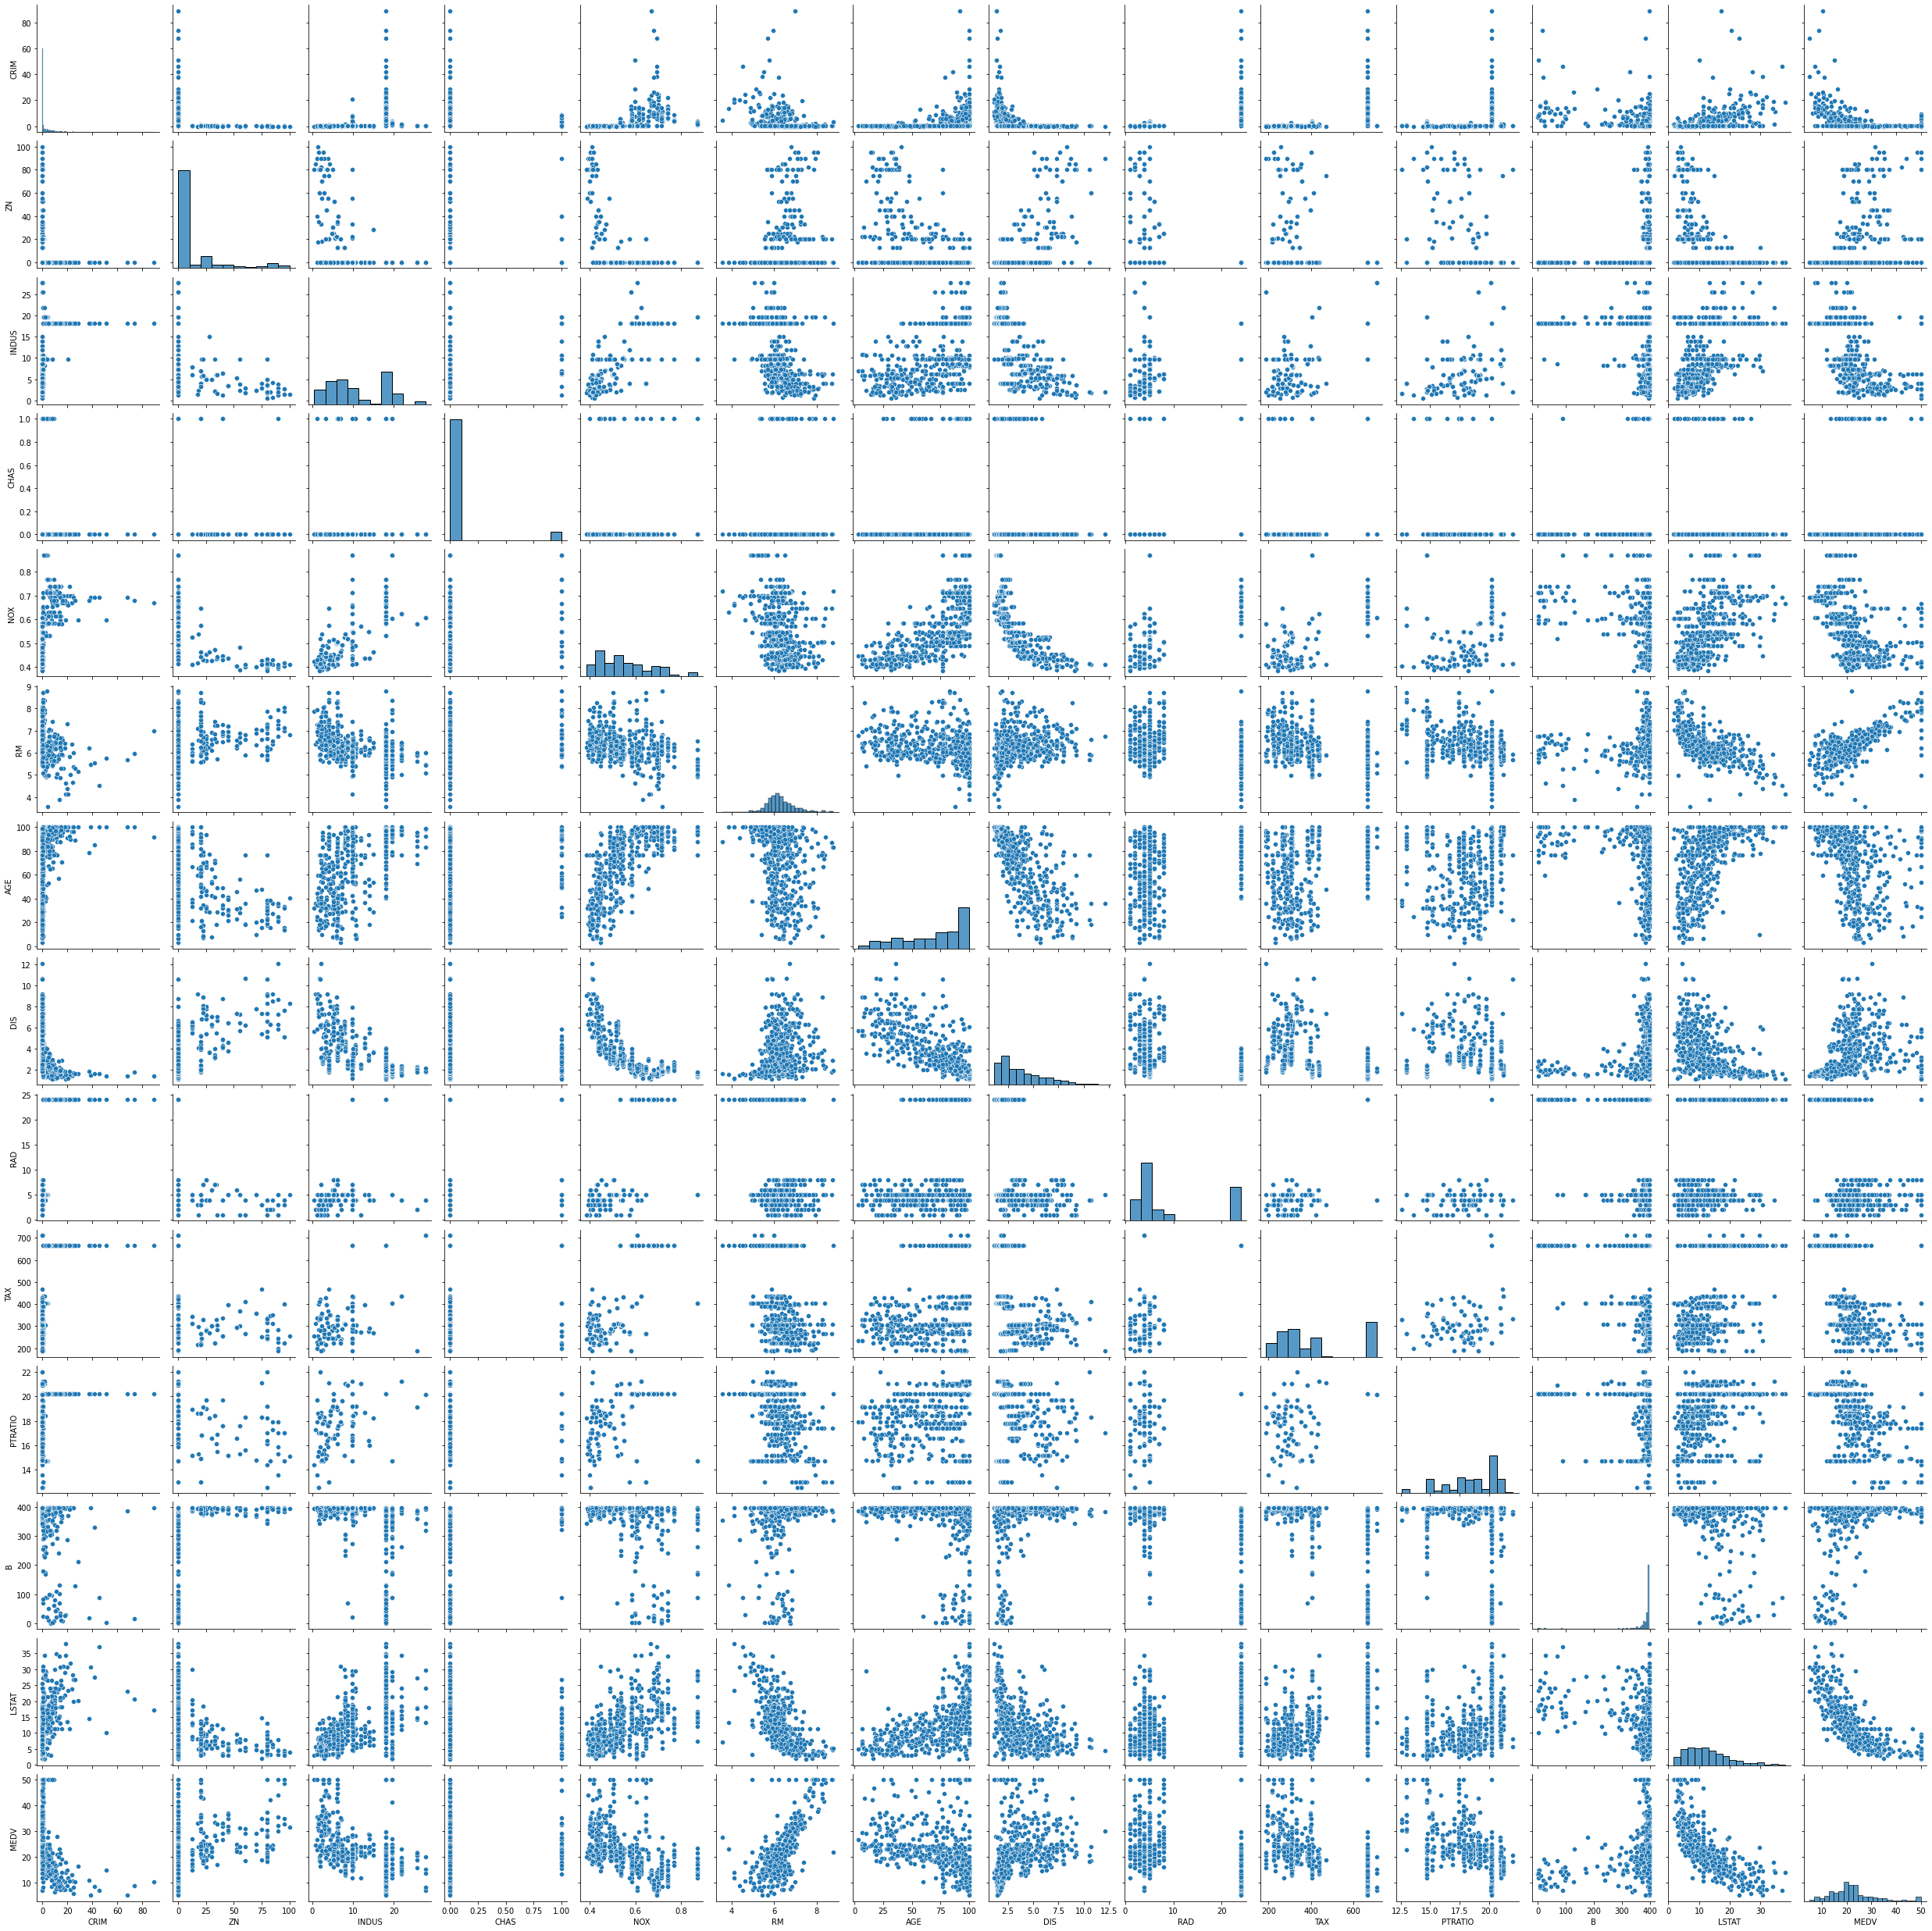

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(df_data);

Plot heatmap to check multi colinearity

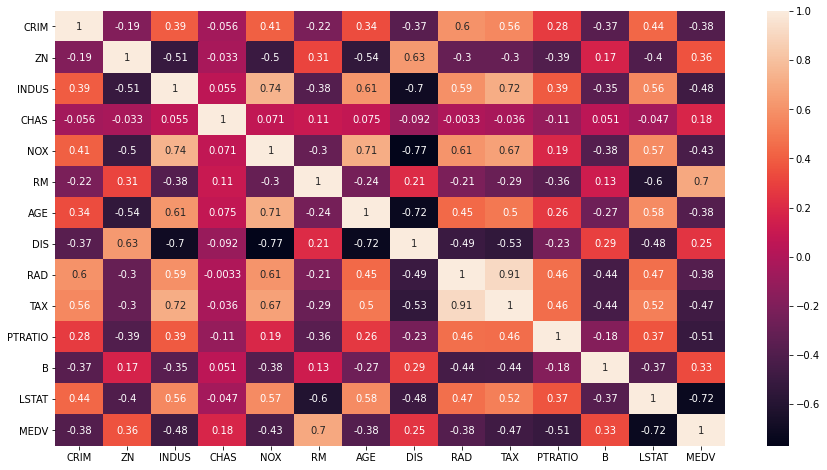

In [33]:
plt.figure(figsize =(15,8))
sns.heatmap(df_data.corr(), annot=True);

**Interpretation from heat-map:**

There is no multi-colinearity in dataset


Q5) Train Test Split

In [18]:
X = df_feature
y= df_target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


Q6) Predict the price using the following algorithms:


a)Linear Regression

In [35]:
Xc = sm.add_constant(y, X)
lr = sm.OLS(y,Xc).fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     86.55
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          3.46e-106
Time:                        12:20:28   Log-Likelihood:                -1177.1
No. Observations:                 404   AIC:                             2382.
Df Residuals:                     390   BIC:                             2438.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6619      5.514      5.560      0.0

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [26]:
predictions = model.predict(X_test)


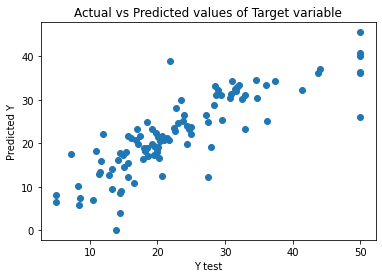

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.title("Actual vs Predicted values of Target variable");

b)KNN

In [37]:
tuned_parameters = {'n_neighbors':np.arange(1,14,2),
                    'metric':['hamming','euclidean','manhatten','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator=knn_classification, param_grid=tuned_parameters,cv=3, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print("Best parameters for KNN classifier:",knn_grid.best_params_,'\n')

Best parameters for KNN classifier: {'metric': 'euclidean', 'n_neighbors': 7} 



In [28]:
df['MEDV'] = df['MEDV'].astype('int64')

We build KNN using the above metrics

In [38]:
knn_model_best = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_model_best.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

**Predictions of house price:**
*Here the target variable is MEDV*

Price['MEDV'] = 30.66 - 0.10*['CRIM']+ 0.04* ['ZN'] - 0.03*['INDUS'] + 3.58*['CHAS'] - 14.39* ['NOX'] + 4.33*['RM']....

**Interpretation:**:
With every unit that independent variable increases, the house value changes by independent variable * 1000 (co-relation) money unit

Q7) Print accuracy of model

In [28]:
#Calculating RMSE(Root mean squared)
print("RMSE obtained", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE obtained 5.849971583465318


In [29]:
model_accuracy = model.score(X_test, y_test)
print("Accuarcy of model is:",round(model_accuracy*100,2),'%')

Accuarcy of model is: 69.5 %


**Important sources:**


**Kaggle dataset:**
https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression 

**Linear Regression documentation :**
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**KNN Regressor:** 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

**Data Normalization and standardization in Machine Learning:**
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


